In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# #Importing dataset from local machine to Google Colab
# from google.colab import files

# uploaded = files.upload()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.read_csv('Invistico_Airline.csv')

# Display the first few rows of the DataFrame
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

categoricals_unique(df)

satisfaction : ['satisfied' 'dissatisfied']
Gender : ['Female' 'Male']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']


In [ ]:
# 3. change data type to numeric
from sklearn import preprocessing

for i in df.columns:
    if df[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df[i]=label_encoder.fit_transform(df[i])

df['Class'].unique()

df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,1,1,0,30,1,1,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,1,0,0,66,1,1,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,1,1,0,10,1,1,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,1,0,0,56,1,0,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,1,1,0,22,1,1,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


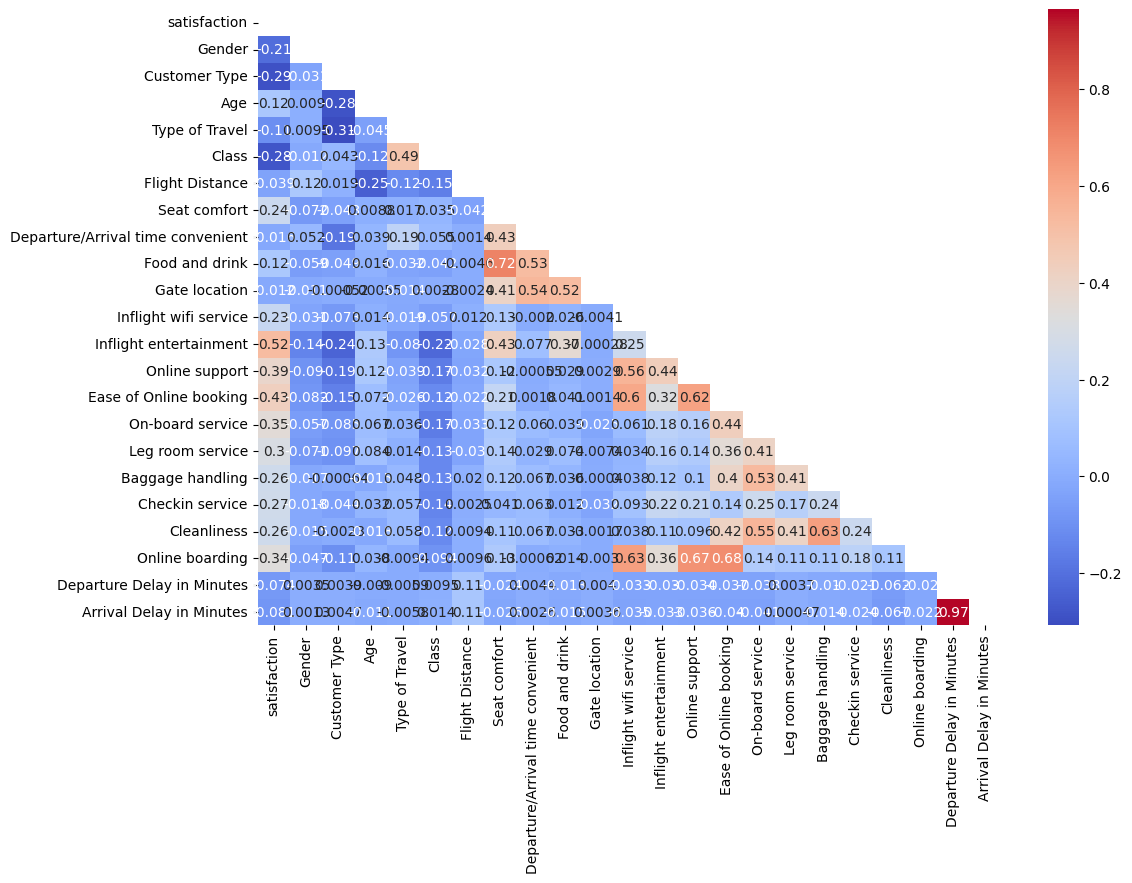

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

#4. do correlation analysis (heat map) attributes that has more than 0.8 can be remove
# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)

# Show the plot
plt.show()

In [ ]:
# Find and remove highly correlated attributes
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated columns
drop_column = df.drop(columns=highly_correlated, inplace=True)

#ADDED by Faris -
print ("Column ni akan diremoveeeeeeee hehe ",highly_correlated)
# drop 1 column which is arrival delay in minutes bcause its the highest correlation

Column ni akan diremoveeeeeeee hehe  {'Arrival Delay in Minutes'}


In [ ]:
# Display the DataFrame before dropping columns
print("\nDataFrame before dropping columns:")
print(df)


DataFrame before dropping columns:
        satisfaction  Gender  Customer Type  Age  Type of Travel  Class  \
0                  1       0              0   65               1      1   
1                  1       1              0   47               1      0   
2                  1       0              0   15               1      1   
3                  1       0              0   60               1      1   
4                  1       0              0   70               1      1   
...              ...     ...            ...  ...             ...    ...   
129875             1       0              1   29               1      1   
129876             0       1              1   63               1      0   
129877             0       1              1   69               1      1   
129878             0       1              1   66               1      1   
129879             0       0              1   38               1      1   

        Flight Distance  Seat comfort  Departure/Arrival time c

In [ ]:
# 5. Remove unnecessary attributes (columns)
df.columns
# ['satisfaction', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight entertainment', 'Seat comfort', 'Food and drink', 'Cleanliness', 'Arrival Delay', 'Leg room service', 'Baggage handling', 'Online support']
df.drop(['Flight Distance', 'Leg room service', 'Baggage handling', 'Online support'], axis=0, inplace=True, errors='ignore')

In [ ]:
# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
print(df)


DataFrame after dropping columns:
        satisfaction  Gender  Customer Type  Age  Type of Travel  Class  \
0                  1       0              0   65               1      1   
1                  1       1              0   47               1      0   
2                  1       0              0   15               1      1   
3                  1       0              0   60               1      1   
4                  1       0              0   70               1      1   
...              ...     ...            ...  ...             ...    ...   
129875             1       0              1   29               1      1   
129876             0       1              1   63               1      0   
129877             0       1              1   69               1      1   
129878             0       1              1   66               1      1   
129879             0       0              1   38               1      1   

        Flight Distance  Seat comfort  Departure/Arrival time co

In [ ]:
#6. scale the dataset using minmax scaler


# Install scikit-learn (if not already installed)
!pip install -U scikit-learn

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is the name of your DataFrame
# Replace 'df' with the actual name of your DataFrame


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale (assuming numeric columns)
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the selected columns using MinMaxScaler
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

# Concatenate the scaled columns with the non-scaled columns
df = pd.concat([df.drop(columns=columns_to_scale), df_scaled], axis=1)

# Display the DataFrame after Min-Max scaling
print("\nDataFrame after Min-Max scaling:")
print(df.head())


DataFrame after Min-Max scaling:
   satisfaction  Gender  Customer Type       Age  Type of Travel  Class  \
0           1.0     0.0            0.0  0.743590             1.0    0.5   
1           1.0     1.0            0.0  0.512821             1.0    0.0   
2           1.0     0.0            0.0  0.102564             1.0    0.5   
3           1.0     0.0            0.0  0.679487             1.0    0.5   
4           1.0     0.0            0.0  0.807692             1.0    0.5   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0         0.031155           0.0                                0.0   
1         0.349804           0.0                                0.0   
2         0.302565           0.0                                0.0   
3         0.083031           0.0                                0.0   
4         0.044052           0.0                                0.0   

   Food and drink  ...  Inflight entertainment  Online support  \
0             0.0  ...

In [ ]:
#7. determine the X(input) and Y(output) of your dataset
# Load the data

# data = pd.read_csv('Invistico_Airline.csv') THIS ONE NO NEED - FARIS

# Identify the independent variables
X = df[['Gender', 'Age', 'Type of Travel', 'Class', 'Inflight entertainment',
        'Seat comfort', 'Food and drink', 'Cleanliness','Departure/Arrival time convenient'
        ,'Gate location', 'Inflight wifi service', 'Ease of Online booking','On-board service'
        ,'Checkin service','Online boarding','Departure Delay in Minutes',
        'Arrival Delay in Minutes']]

# Identify the dependent variable
y = df['satisfaction']

# Print the X and Y variables
print(X)
print(y)

        Gender       Age  Type of Travel  Class  Inflight entertainment  \
0          0.0  0.743590             1.0    0.5                     0.8   
1          1.0  0.512821             1.0    0.0                     0.4   
2          0.0  0.102564             1.0    0.5                     0.0   
3          0.0  0.679487             1.0    0.5                     0.8   
4          0.0  0.807692             1.0    0.5                     0.6   
...        ...       ...             ...    ...                     ...   
129875     0.0  0.282051             1.0    0.5                     1.0   
129876     1.0  0.717949             1.0    0.0                     0.2   
129877     1.0  0.794872             1.0    0.5                     0.4   
129878     1.0  0.756410             1.0    0.5                     0.4   
129879     0.0  0.397436             1.0    0.5                     0.6   

        Seat comfort  Food and drink  Cleanliness  \
0                0.0             0.0          

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are your input and output variables
# Replace 'X' and 'Y' with the actual variable names

# Split the dataset into 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)